In [46]:
import imaging_behavior_functions
import odor_behavioral_analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize
import scipy.io
import os
import mat73
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.interpolate import interp1d
from scipy.stats import iqr
from PIL import Image
import cv2
from IPython.display import display, clear_output
import time
import seaborn as sns
from scipy.stats import iqr
from scipy.ndimage import gaussian_filter1d
import glob
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import plotly.graph_objects as go
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
import tensorflow as tf

In [47]:
base_path = "C:/Users/wilson/OneDrive - Harvard University/Thesis - Wilson lab/2P imaging/preprocessed data/qualified_sessions/multi_trial_sessions/"
example_path_data = base_path+"20230508-2_hDeltaB_syntGCAMP7f_long_nojump/data/"
example_path_results = base_path+"20230508-2_hDeltaB_syntGCAMP7f_long_nojump/results/"
trial_num = 3
odor_threshold = 5
time_interval_threshold = 16  # Assuming time is in seconds or an equivalent unit
k = 8
window_size = 30

is_mat73, roi_df, dff_raw, kinematics_raw, preprocessed_vars_ds, preprocessed_vars_odor = imaging_behavior_functions.load_intermediate_mat(example_path_data,trial_num)
behav_df = imaging_behavior_functions.make_df_behavior(dff_raw, preprocessed_vars_ds, preprocessed_vars_odor,trial_num,ball_d = 9)
xPos, yPos = imaging_behavior_functions.reconstruct_path(behav_df, ball_d = 9)
roi_names, hdeltab_index, epg_index, hdeltab_sequence, epg_sequence = imaging_behavior_functions.get_roi_seq(roi_df)
dff_all_rois, dff_time = imaging_behavior_functions.load_dff_raw(is_mat73, dff_raw)
neural_df = imaging_behavior_functions.make_df_neural(dff_all_rois, dff_time, roi_names, hdeltab_index, epg_index, hdeltab_sequence, epg_sequence)
#behav_df, padded_result_df, smoothed_df = odor_behavioral_analysis.analysis_dfs(behav_df, time_interval_threshold, k, window_size)
combined_df = imaging_behavior_functions.combine_df(behav_df, neural_df)
#smoothed_df["translationalV_smoothed"] = np.sqrt(smoothed_df["fwV_smoothed"]**2+smoothed_df["sideV_smoothed"]**2)

In [48]:
selected_df = neural_df.filter(like='hDeltaB')
selected_df

,hDeltaB_0,hDeltaB_1,hDeltaB_2,hDeltaB_3,hDeltaB_4,hDeltaB_5,hDeltaB_6,hDeltaB_7,hDeltaB_8,hDeltaB_9,...,hDeltaB_19,hDeltaB_20,hDeltaB_21,hDeltaB_22,hDeltaB_23,hDeltaB_24,hDeltaB_25,hDeltaB_26,hDeltaB_27,hDeltaB_28
0,0.413076,0.891614,1.164973,1.609134,1.984073,2.249427,1.877969,1.504941,1.405290,0.735781,...,0.309710,0.359268,0.777622,0.775615,0.797126,0.998792,0.932902,0.993306,1.201088,0.530339
1,0.499417,0.962729,1.053957,1.436337,2.025526,2.139000,1.730048,1.511358,1.399904,0.753539,...,0.306364,0.496130,0.984734,0.922481,0.923715,1.070741,1.194694,1.122879,1.231340,0.465727
2,0.577785,0.984609,1.066091,1.396082,1.988056,2.020380,1.546586,1.373914,1.284804,0.675826,...,0.418154,0.782069,1.284869,1.206275,1.283981,1.290078,1.419642,1.328987,1.246792,0.175071
3,0.558673,1.057260,1.137091,1.454888,1.887580,1.879595,1.408475,1.174004,1.131097,0.540336,...,0.659119,1.115210,1.569272,1.573681,1.771605,1.461705,1.543120,1.463468,1.293486,0.129527
4,0.539464,1.188297,1.152967,1.500552,1.770442,1.697852,1.392689,1.040371,1.012579,0.445933,...,0.840335,1.259488,1.718039,1.879824,1.921651,1.511928,1.725894,1.493576,1.531867,0.370678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2492,0.980340,1.148790,0.991475,1.013769,1.007894,0.996466,0.985551,0.870528,0.833501,0.408290,...,0.278312,0.520095,0.812655,0.927876,1.202487,1.670374,2.240419,1.599948,2.281854,1.284814
2493,1.060583,1.141295,0.952138,0.929551,0.933131,0.950896,0.883044,0.937981,0.850980,0.284454,...,0.200714,0.492108,0.826149,0.994849,1.229352,1.698900,2.152939,1.648487,2.345736,1.227089
2494,1.154471,1.004325,1.019376,0.914501,0.856704,0.882732,0.867287,0.980338,0.811328,0.273204,...,0.107617,0.433008,0.886758,0.987147,1.167925,1.624782,2.062322,1.568097,2.264013,1.086277
2495,1.180268,0.910052,1.068795,0.919833,0.848033,0.794715,0.953527,0.896269,0.785973,0.292771,...,0.085110,0.405142,0.978929,0.917335,1.150793,1.524649,2.038805,1.482811,2.126196,1.078353


In [49]:
def perform_pca(selected_df, n_components=3):
    """
    Perform PCA on the given dataframe.

    Args:
    - data (pd.DataFrame): The dataframe containing neuron activity data.
    - n_components (int): The number of principal components to compute.

    Returns:
    - pca (PCA object): The PCA object after fitting the data.
    - transformed_data (np.array): Data transformed into principal components.
    - explained_variance_ratio (np.array): The amount of variance explained by each of the selected components.
    """
    # Standardize the data (important for PCA)
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(selected_df)

    # Perform PCA
    pca = PCA(n_components=n_components)
    transformed_data = pca.fit_transform(scaled_data)
    explained_variance_ratio = pca.explained_variance_ratio_

    return pca, transformed_data, explained_variance_ratio
pca, transformed_data, explained_variance_ratio = perform_pca(selected_df,n_components=3)

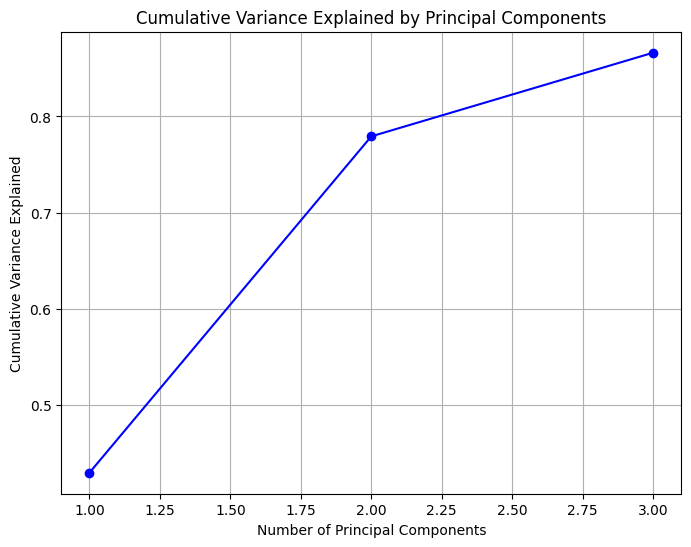

In [50]:
# Calculate cumulative variance explained
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
n_components = 3
# Plot cumulative variance explained
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, n_components + 1), cumulative_variance, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('Cumulative Variance Explained by Principal Components')
plt.grid(True)
plt.show()

In [51]:
roi_kw = 'hDeltaB'
roi_mtx = imaging_behavior_functions.extract_heatmap(neural_df, roi_kw, 1, example_path_results, trial_num)
param_df = imaging_behavior_functions.fit_sinusoid(neural_df,roi_mtx)
param_df

,time,phase,baseline,amplitude,phase_error,baseline_error,amplitude_error
0,0.000000,0.897598,0.405364,1.502523,0.163167,0.173392,0.245263
1,0.240313,0.673198,0.481410,1.365716,0.172138,0.165837,0.233967
2,0.480626,0.448799,0.574400,1.151193,0.234470,0.188909,0.264368
3,0.720939,0.000000,0.676204,1.137974,0.272467,0.215685,0.299906
4,0.961252,6.058786,0.751056,1.305415,0.232275,0.211169,0.293991
...,...,...,...,...,...,...,...
2492,598.859955,0.000000,0.302261,1.644584,0.065213,0.074604,0.103734
2493,599.100268,0.000000,0.280733,1.640219,0.066046,0.075363,0.104800
2494,599.340581,0.000000,0.261857,1.513341,0.069904,0.073594,0.102336
2495,599.580894,6.283185,0.247494,1.440352,0.074312,0.074457,0.103532


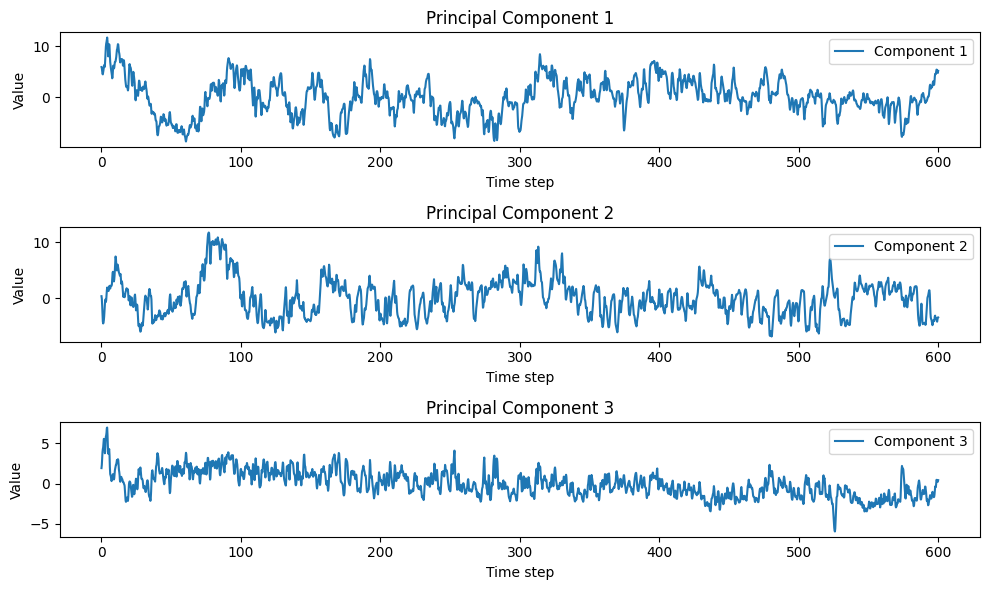

In [52]:
# visualze top PCstime_steps = range(transformed_data.shape[0])

n_components = 3
time_steps = range(transformed_data.shape[0])

# Create a figure with subplots
fig, axes = plt.subplots(n_components, 1, figsize=(10, 2*n_components))

for i in range(n_components):
    ax = axes[i]
    ax.plot(neural_df.time, transformed_data[:, i], label=f'Component {i+1}')
    ax.set_title(f'Principal Component {i+1}')
    ax.set_xlabel('Time step')
    ax.set_ylabel('Value')
    ax.legend()

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

In [53]:
# Extract the first three PCs
pc1 = transformed_data[:, 0]
pc2 = transformed_data[:, 1]
pc3 = transformed_data[:, 2]

# Time steps for coloring
phase = np.array(param_df.phase)

# Create the figure
fig = go.Figure(data=[go.Scatter3d(
    x=pc1,
    y=pc2,
    z=pc3,
    mode='markers',
    marker=dict(
        size=5,
        color=phase,  # Set color to time steps
        colorscale='Viridis',  # Choose a color scale
        colorbar=dict(title='Phase'),
        opacity=0.8
    )
)])

# Set the layout of the figure
fig.update_layout(
    title='Trajectory of the First 3 Principal Components in State Space',
    scene=dict(
        xaxis_title='PC1',
        yaxis_title='PC2',
        zaxis_title='PC3'
    ),
    margin=dict(l=0, r=0, b=0, t=30)
)

# Show the figure
fig.show()


In [54]:
# Extract the first three PCs
pc1 = transformed_data[:, 0]
pc2 = transformed_data[:, 1]
pc3 = transformed_data[:, 2]

# Time steps for coloring
amplitude = np.array(param_df.amplitude)

# Create the figure
fig = go.Figure(data=[go.Scatter3d(
    x=pc1,
    y=pc2,
    z=pc3,
    mode='markers',
    marker=dict(
        size=5,
        color=amplitude,  # Set color to time steps
        colorscale='Viridis',  # Choose a color scale
        colorbar=dict(title='Amplitude'),
        opacity=0.8
    )
)])

# Set the layout of the figure
fig.update_layout(
    title='Trajectory of the First 3 Principal Components in State Space',
    scene=dict(
        xaxis_title='PC1',
        yaxis_title='PC2',
        zaxis_title='PC3'
    ),
    margin=dict(l=0, r=0, b=0, t=30)
)

# Show the figure
fig.show()


In [55]:
# Extract the first three PCs
pc1 = transformed_data[:, 0]
pc2 = transformed_data[:, 1]
pc3 = transformed_data[:, 2]

# Time steps for coloring
baseline = np.array(param_df.baseline)

# Create the figure
fig = go.Figure(data=[go.Scatter3d(
    x=pc1,
    y=pc2,
    z=pc3,
    mode='markers',
    marker=dict(
        size=4,
        color=baseline,  # Set color to time steps
        colorscale='Viridis',  # Choose a color scale
        colorbar=dict(title='Baseline'),
        opacity=0.5
    )
)])

'''for idx in big_drop_indices:
    fig.add_trace(go.Scatter3d(x=pc1[idx:idx+2], y=pc2[idx:idx+2], z=pc3[idx:idx+2],
                               mode='lines',
                               line=dict(color='red', width=2)))

for idx in big_increase_indices:
    fig.add_trace(go.Scatter3d(x=pc1[idx:idx+2], y=pc2[idx:idx+2], z=pc3[idx:idx+2],
                               mode='lines',
                               line=dict(color='black', width=2)))'''    
# Set the layout of the figure
fig.update_layout(
    title='Trajectory of the First 3 Principal Components in State Space',
    scene=dict(
        xaxis_title='PC1',
        yaxis_title='PC2',
        zaxis_title='PC3'
    ),
    margin=dict(l=0, r=0, b=0, t=30)
)

# Show the figure
fig.show()


In [56]:
# Extract the first three PCs
pc1 = gaussian_filter1d(transformed_data[:, 0], sigma=5)s
pc2 = gaussian_filter1d(transformed_data[:, 1],sigma=5)
pc3 = gaussian_filter1d(transformed_data[:, 2],sigma=5)

# Time steps for coloring
#lower_threshold = np.percentile(smoothed_df.fwV_smoothed, 5)
#upper_threshold = np.percentile(smoothed_df.fwV_smoothed, 95)
#color_var = np.abs(np.clip(smoothed_df.fwV_smoothed,lower_threshold, upper_threshold))
color_var = neural_df.time

# Create the figure
fig = go.Figure(data=[go.Scatter3d(
    x=pc1,
    y=pc2,
    z=pc3,
    mode='markers',
    marker=dict(size=5, color=color_var, colorscale='Viridis')
)])

# Set the layout of the figure
fig.update_layout(
    title='Trajectory of the First 3 Principal Components in State Space',
    scene=dict(
        xaxis_title='PC1',
        yaxis_title='PC2',
        zaxis_title='PC3'
    ),
    margin=dict(l=0, r=0, b=0, t=30)
)

# Show the figure
fig.show()
